In [2]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

%matplotlib inline

# Part 1

## Question 4: In a three-class (two-dimensional) problem, the feature vectors in each class are normally distributed according to the following covariance matrix:

## The mean vectors for each class are: [0.5, 0.5]T, [2.0, 2.0]T, [1.3, 1.8]T. Write a function to plot the three classes (using different colors), with 100 examples per class.

In [10]:
np.random.seed(42)

In [3]:
cov = np.array([[1.2, 0.4], [0.4, 1.8]])
mean_x = np.array([0.5, 0.5]).T
mean_y = np.array([2.0, 2.0]).T
mean_z = np.array([1.3, 1.8]).T

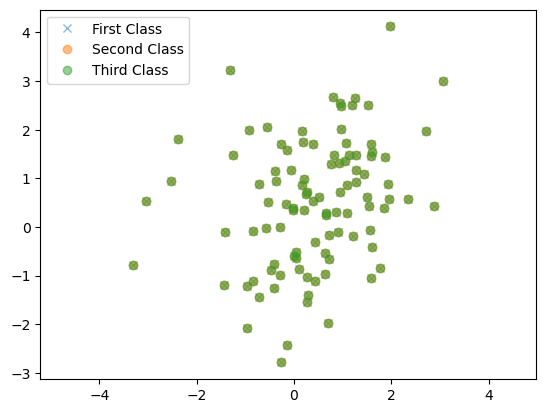

In [24]:
st_class_x, st_class_y = np.random.multivariate_normal(mean_x, cov, 100).T
nd_class_x, nd_class_y = np.random.multivariate_normal(mean_y, cov, 100).T
td_class_x, td_class_y = np.random.multivariate_normal(mean_z, cov, 100).T


plt.plot(st_class_x, st_class_y, 'x', label="First Class", alpha=0.5)
plt.plot(st_class_x, st_class_y, 'o', label="Second Class", alpha=0.5)
plt.plot(st_class_x, st_class_y, 'o', label="Third Class", alpha=0.5)
plt.legend()
plt.axis('equal')
plt.show()

# Part 2

## Question 3: Using the Python linear programming solver from cvxopt (check here), solve the following problem. The answer is the same presented in the class.

In [36]:
c = matrix([-5.0, -3.0])
A = matrix([[2.0, 2.0, -2.0, 0.0, 0.0], [2.0, -4.0, 1.0, -1.0, 1.0]])
b = matrix([33.0, 8.0, 5.0, -1.0, 8.0])
print(c)
print(A)
print(b)

[-5.00e+00]
[-3.00e+00]

[ 2.00e+00  2.00e+00]
[ 2.00e+00 -4.00e+00]
[-2.00e+00  1.00e+00]
[ 0.00e+00 -1.00e+00]
[ 0.00e+00  1.00e+00]

[ 3.30e+01]
[ 8.00e+00]
[ 5.00e+00]
[-1.00e+00]
[ 8.00e+00]



In [37]:
sol = solvers.lp(c, A, b)

     pcost       dcost       gap    pres   dres   k/t
 0: -5.3100e+01 -1.5027e+02  8e+01  0e+00  7e-01  1e+00
 1: -7.0024e+01 -7.9172e+01  6e+00  4e-16  7e-02  2e-01
 2: -7.4102e+01 -7.4297e+01  1e-01  3e-16  1e-03  1e-02
 3: -7.4166e+01 -7.4168e+01  1e-03  6e-16  1e-05  1e-04
 4: -7.4167e+01 -7.4167e+01  1e-05  3e-16  1e-07  1e-06
 5: -7.4167e+01 -7.4167e+01  1e-07  4e-16  1e-09  1e-08
Optimal solution found.


In [40]:
x1 = sol['x'][0]
x2 = sol['x'][1]

if (x1 < x2):
    local_minimum = x1
    local_maximum = x2
else:
    local_minimum = x2
    local_maximum = x1


# Print the solution
print("Optimal solution:")
print(f"Local Minimum = {local_minimum:.2f}")
print(f"Local Maximum = {local_maximum:.2f}")

Optimal solution:
Local Minimum = 4.17
Local Maximum = 12.33


## Question 4: For the following optimization problem:
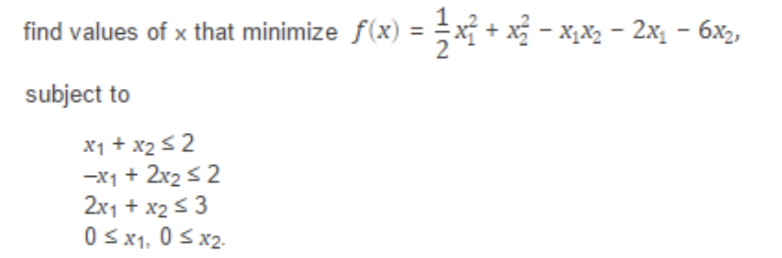

### a) Classify (convex/non-convex? Linear or quadratic programming?)

In [42]:
Hessian_mat = np.array([[1, -1],
                         [-1, 2]])
eigen_values = np.linalg.eigvals(Hessian_mat)

if (np.all(eigen_values>0)):
    print("Convex Function")
elif (np.all(eigen_values >= 0)):
    print("Convex Function (positive semidefinite)")
else:
    print("Fuction not convex")

Convex Function


### b) Using an appropriate Python method from cvxopt, solve the optimization above. 

In [56]:
Q = 2*matrix([ [2, .5], [.5, 1] ])
np.array(Q)

array([[4., 1.],
       [1., 2.]])

In [91]:
Q = matrix([[0.5, -0.5],
           [-0.5, 1.0]])
p = matrix([-2.0, -6.0])
G = matrix([[-1.0, -1.0], [1.0, -2.0], [-2.0, -1.0], [-1.0, 0.0], [0.0, -1.0]]).T
h = matrix([-2.0, -2.0, -3.0, 0.0, 0.0])
A = None
b = None
print(f"Quadratic cost terms: \n{np.array(Q)}")
print(f"Coefficient Linear Terms: \n {np.array(p)}")
print(f"Inequality Coefficient: \n {np.array(G)}")
print(f"Inequality Constraint Vector: \n {np.array(h)}")
print(f"The equality Constraint Vector: \n{np.array(A)}")

Quadratic cost terms: 
[[ 0.5 -0.5]
 [-0.5  1. ]]
Coefficient Linear Terms: 
 [[-2.]
 [-6.]]
Inequality Coefficient: 
 [[-1. -1.]
 [ 1. -2.]
 [-2. -1.]
 [-1.  0.]
 [ 0. -1.]]
Inequality Constraint Vector: 
 [[-2.]
 [-2.]
 [-3.]
 [ 0.]
 [ 0.]]
The equality Constraint Vector: 
None


In [92]:
sol = solvers.qp(Q, p, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -1.1773e+01 -1.9874e+01  8e+00  5e-17  3e+00
 1: -1.3791e+01 -1.5316e+01  2e+00  1e-16  9e-01
 2: -3.3719e+01 -3.9320e+01  6e+00  9e-16  8e-01
 3: -6.6861e+01 -9.1528e+01  2e+01  7e-15  4e-02
 4: -6.7999e+01 -6.8555e+01  6e-01  4e-15  3e-16
 5: -6.8000e+01 -6.8006e+01  6e-03  1e-15  4e-16
 6: -6.8000e+01 -6.8000e+01  6e-05  4e-15  4e-16
Optimal solution found.


In [93]:
x1 = sol['x'][0]
x2 = sol['x'][1]

if (x1 < x2):
    local_minimum = x1
    local_maximum = x2
else:
    local_minimum = x2
    local_maximum = x1

# Print the solution
print("Optimal solution:")
print(f"Local Minimum = {local_minimum:.2f}")
print(f"Local Maximum = {local_maximum:.2f}")

Optimal solution:
Local Minimum = 16.00
Local Maximum = 20.00
